In [1]:
# Imports

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import optimizers

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import imageio
import os

In [2]:
# Main path

root_url = './input/'

In [3]:
# Load datasets

df_train = pd.read_csv(root_url + 'train_data.csv')
df_example = pd.read_csv(root_url + 'sample_submission.csv')

In [4]:
# Image params 

IMG_SHAPE = (135, 180)
FILE_SHAPE = (135, 180, 3)
COLOR_MODE = 'rgb'

In [5]:
# Load directory train_img from dataframe df_train["file"]

datagen_with_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=27,
        width_shift_range=0.15,
        height_shift_range=0.15,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        rescale=1/255,
        fill_mode='nearest')

train_set_with_augmentation = datagen_with_augmentation.flow_from_dataframe(
    df_train,
    directory= root_url + "train_img/",
    x_col="file",
    y_col=["isLeela", "isFry", "isBender"],
    target_size=IMG_SHAPE,
    color_mode=COLOR_MODE,
    batch_size=32,
    class_mode="raw",                                              
    shuffle=False)

Found 8156 validated image filenames.


In [6]:
# Model

model = models.Sequential()
model.add(layers.Conv2D(256, (3, 3), activation='relu', input_shape=(135, 180, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(1024, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dense(3, activation='sigmoid'))

model.compile(
    optimizer= "adam",
    loss='binary_crossentropy',
    metrics=['accuracy']
)


2022-07-23 16:00:17.267552: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-23 16:00:17.395007: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-23 16:00:17.395828: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-23 16:00:17.397112: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [7]:
# Summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 133, 178, 256)     7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 66, 89, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 87, 512)       1180160   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 43, 512)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 41, 512)       2359808   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 20, 512)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 18, 1024)      4

In [8]:
# Training

history = model.fit(
      train_set_with_augmentation,
      epochs=100
)

2022-07-23 16:00:20.424331: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-07-23 16:00:22.138324: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


255/255 [==============================] - 109s 387ms/step - loss: 0.6536 - accuracy: 0.3282
Epoch 2/100
255/255 [==============================] - 66s 260ms/step - loss: 0.5345 - accuracy: 0.4359
Epoch 3/100
255/255 [==============================] - 66s 260ms/step - loss: 0.5053 - accuracy: 0.4349
Epoch 4/100
255/255 [==============================] - 66s 259ms/step - loss: 0.4304 - accuracy: 0.4793
Epoch 5/100
255/255 [==============================] - 65s 256ms/step - loss: 0.3685 - accuracy: 0.5016
Epoch 6/100
255/255 [==============================] - 66s 259ms/step - loss: 0.3208 - accuracy: 0.5131
Epoch 7/100
255/255 [==============================] - 67s 261ms/step - loss: 0.2956 - accuracy: 0.5294
Epoch 8/100
255/255 [==============================] - 66s 258ms/step - loss: 0.2700 - accuracy: 0.5434
Epoch 9/100
255/255 [==============================] - 66s 259ms/step - loss: 0.2493 - accuracy: 0.5493
Epoch 10/100
255/255 [==============================] - 65s 256ms/step - lo

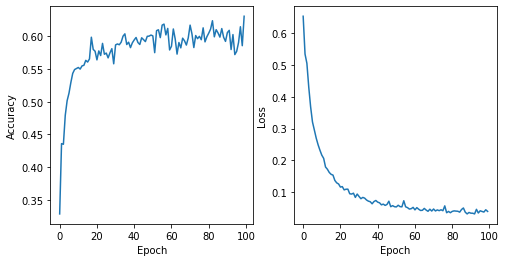

In [9]:
# Evaluation with plots

plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
plt.plot(history.epoch, history.history["accuracy"])
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.subplot(1,2,2)
plt.plot(history.epoch, history.history["loss"])
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

In [10]:
# Root

test_img_name_list = os.listdir(root_url + "/test_img")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  import sys


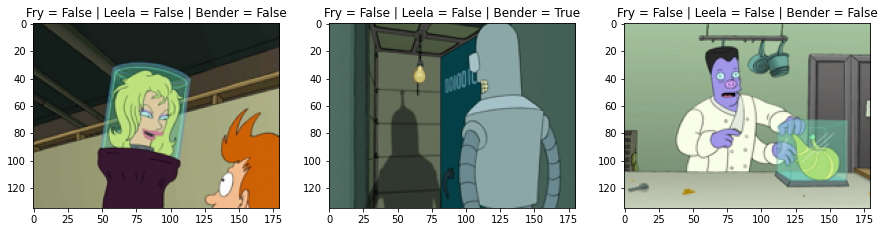

In [11]:
DECISION_BOUNDARY = 0.5
plt.figure(figsize=[15,4])

for i in range(3):
    plt.subplot(1,3,i+1)
    image = imageio.imread(root_url + "test_img/" + test_img_name_list[i])
    prediction = model.predict(image[None, :]/255)

    isLeela = False
    isFry = False
    isBender = False

    if prediction[0][0] > DECISION_BOUNDARY:
        isLeela = True
    if prediction[0][1] > DECISION_BOUNDARY:
        isFry = True
    if prediction[0][2] > DECISION_BOUNDARY:
        isBender = True
    plt.imshow(image)
    plt.title(f"Fry = {isFry} | Leela = {isLeela} | Bender = {isBender}")
plt.show()

In [12]:
# Get the test images filenames sorted like the example submission

test_img_name_list = df_example["file"].to_list()

In [13]:
# Create an empty answer dataframe

df_answer = pd.DataFrame({"file":test_img_name_list, 
                   "isLeela":np.zeros(1000, dtype=int), 
                   "isFry":np.zeros(1000, dtype=int), 
                   "isBender":np.zeros(1000, dtype=int), 
})

In [14]:
# Predict the test images individually and fill the answer dataframe accordingly

DECISION_BOUNDARY = 0.5
for n, row in enumerate(df_answer.iterrows()):
    if n%100 == 0:
        print(f"{n}/1000 predicted")
    image = imageio.imread(root_url + "test_img/" + row[1][0])
    prediction = model.predict(image[None, :]/255)
    if prediction[0][0] > DECISION_BOUNDARY:
        df_answer.at[n,'isLeela'] = 1
    if prediction[0][1] > DECISION_BOUNDARY:
        df_answer.at[n,'isFry'] = 1
    if prediction[0][2] > DECISION_BOUNDARY:
        df_answer.at[n,'isBender'] = 1

0/1000 predicted


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  


100/1000 predicted
200/1000 predicted
300/1000 predicted
400/1000 predicted
500/1000 predicted
600/1000 predicted
700/1000 predicted
800/1000 predicted
900/1000 predicted


In [15]:
df_answer.head()

,file,isLeela,isFry,isBender
0,Futurama_4_03193.png,1,0,1
1,Futurama_3_12049.png,0,0,0
2,Futurama_2_10033.png,1,0,0
3,Futurama_6_10513.png,0,0,0
4,Futurama_3_22009.png,0,0,1


In [16]:
# Save submission file

df_answer.to_csv('submission-keras-conv.csv', index=False)